In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from collections import Counter
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

from pyod.models.hbos import HBOS

from sklearn.covariance import EllipticEnvelope

from pyod.models.knn import KNN

from sklearn.neighbors import LocalOutlierFactor

from pyod.models.cof import COF

from sklearn.cluster import DBSCAN

from pyod.models.cblof import CBLOF

from pyod.models.abod import ABOD

from pyod.models.loda import LODA

from sklearn.ensemble import IsolationForest
from pyod.models.iforest import IsolationForest

In [2]:
df_train=pd.read_csv("RavdessAudioOnlyFeatures_TRAIN.csv")
df_test=pd.read_csv("RavdessAudioOnlyFeatures_TEST.csv")

df_train["emotion"]=df_train["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_train["emotional_intensity"]=df_train["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_train["sex"]=df_train["sex"].replace(["M", "F"],[0,1])
df_train["statement"]=df_train["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_train["vocal_channel"]=df_train["vocal_channel"].replace(["speech", "song"],[0,1])
y_train=df_train.emotion.values
X_train=df_train.drop(columns=["emotion", "modality","emotional_intensity","sex","statement","vocal_channel","repetition","actor","filename"]).values

df_test["emotion"]=df_test["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_test["emotional_intensity"]=df_test["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_test["sex"]=df_test["sex"].replace(["M", "F"],[0,1])
df_test["statement"]=df_test["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_test["vocal_channel"]=df_test["vocal_channel"].replace(["speech", "song"],[0,1])
y_test=df_test.emotion.values
X_test=df_test.drop(columns=["emotion", "modality","emotional_intensity","sex","statement","vocal_channel","repetition","actor","filename"]).values


In [3]:
frames = [df_train, df_test]
df = pd.concat(frames)
X = df.drop(columns=["emotion", "modality","emotional_intensity","sex","statement","vocal_channel","repetition","actor","filename"]).values
X_unscaled = df.drop(columns=["emotion", "modality","emotional_intensity","sex","statement","vocal_channel","repetition","actor","filename"]).values
y=df.emotion.values

In [4]:
scl = StandardScaler()
X = scl.fit_transform(X)

# Distance Based

## KNN


In [5]:
from pyod.models.knn import KNN

In [6]:
clf = KNN(n_neighbors=5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [7]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([2222,  230]))

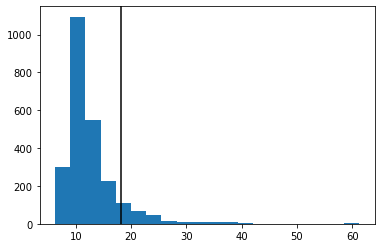

In [8]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()